In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

#### Importing the dataset

In [3]:
kyphosis = pd.read_csv('C:\\Users\\421803\\Desktop\\Tat\\Python\\ML Algorithms dataset\\kyphosis.csv')

In [4]:
kyphosis

Kyphosis  Age  Number  Start
0    absent   71       3      5
1    absent  158       3     14
2   present  128       4      5
3    absent    2       5      1
4    absent    1       4     15
..      ...  ...     ...    ...
76  present  157       3     13
77   absent   26       7     13
78   absent  120       2     13
79  present   42       7      6
80   absent   36       4     13

[81 rows x 4 columns]

#### Extracting the independent & dependent variables

In [90]:
X = kyphosis.iloc[:,[1,2,3]].values

In [91]:
X

array([[ 71,   3,   5],
       [158,   3,  14],
       [128,   4,   5],
       [  2,   5,   1],
       [  1,   4,  15],
       [  1,   2,  16],
       [ 61,   2,  17],
       [ 37,   3,  16],
       [113,   2,  16],
       [ 59,   6,  12],
       [ 82,   5,  14],
       [148,   3,  16],
       [ 18,   5,   2],
       [  1,   4,  12],
       [168,   3,  18],
       [  1,   3,  16],
       [ 78,   6,  15],
       [175,   5,  13],
       [ 80,   5,  16],
       [ 27,   4,   9],
       [ 22,   2,  16],
       [105,   6,   5],
       [ 96,   3,  12],
       [131,   2,   3],
       [ 15,   7,   2],
       [  9,   5,  13],
       [  8,   3,   6],
       [100,   3,  14],
       [  4,   3,  16],
       [151,   2,  16],
       [ 31,   3,  16],
       [125,   2,  11],
       [130,   5,  13],
       [112,   3,  16],
       [140,   5,  11],
       [ 93,   3,  16],
       [  1,   3,   9],
       [ 52,   5,   6],
       [ 20,   6,   9],
       [ 91,   5,  12],
       [ 73,   5,   1],
       [ 35,   3

In [92]:
y = kyphosis.iloc[:,[0]].values

In [93]:
y

array([['absent'],
       ['absent'],
       ['present'],
       ['absent'],
       ['absent'],
       ['absent'],
       ['absent'],
       ['absent'],
       ['absent'],
       ['present'],
       ['present'],
       ['absent'],
       ['absent'],
       ['absent'],
       ['absent'],
       ['absent'],
       ['absent'],
       ['absent'],
       ['absent'],
       ['absent'],
       ['absent'],
       ['present'],
       ['present'],
       ['absent'],
       ['present'],
       ['absent'],
       ['absent'],
       ['absent'],
       ['absent'],
       ['absent'],
       ['absent'],
       ['absent'],
       ['absent'],
       ['absent'],
       ['absent'],
       ['absent'],
       ['absent'],
       ['present'],
       ['absent'],
       ['present'],
       ['present'],
       ['absent'],
       ['absent'],
       ['absent'],
       ['absent'],
       ['present'],
       ['absent'],
       ['absent'],
       ['present'],
       ['absent'],
       ['absent'],
       ['absent'],
 

#### Data Analysis

<Axes: xlabel='Kyphosis', ylabel='Age'>

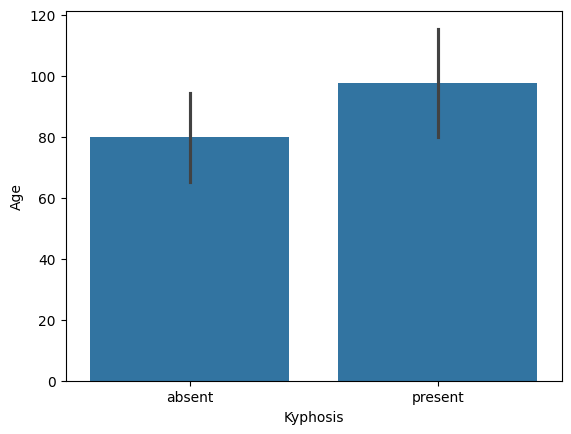

In [26]:
sns.barplot(x='Kyphosis',y='Age',data=kyphosis)

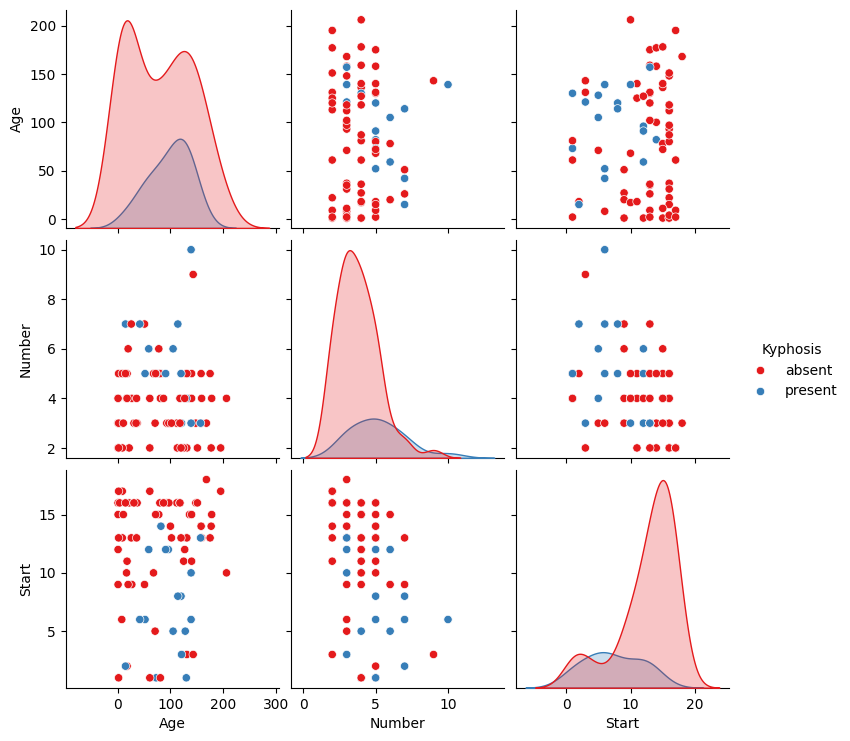

In [27]:
sns.pairplot(kyphosis,hue='Kyphosis',palette='Set1')

#### Visualize the data

<Axes: xlabel='Age', ylabel='count'>

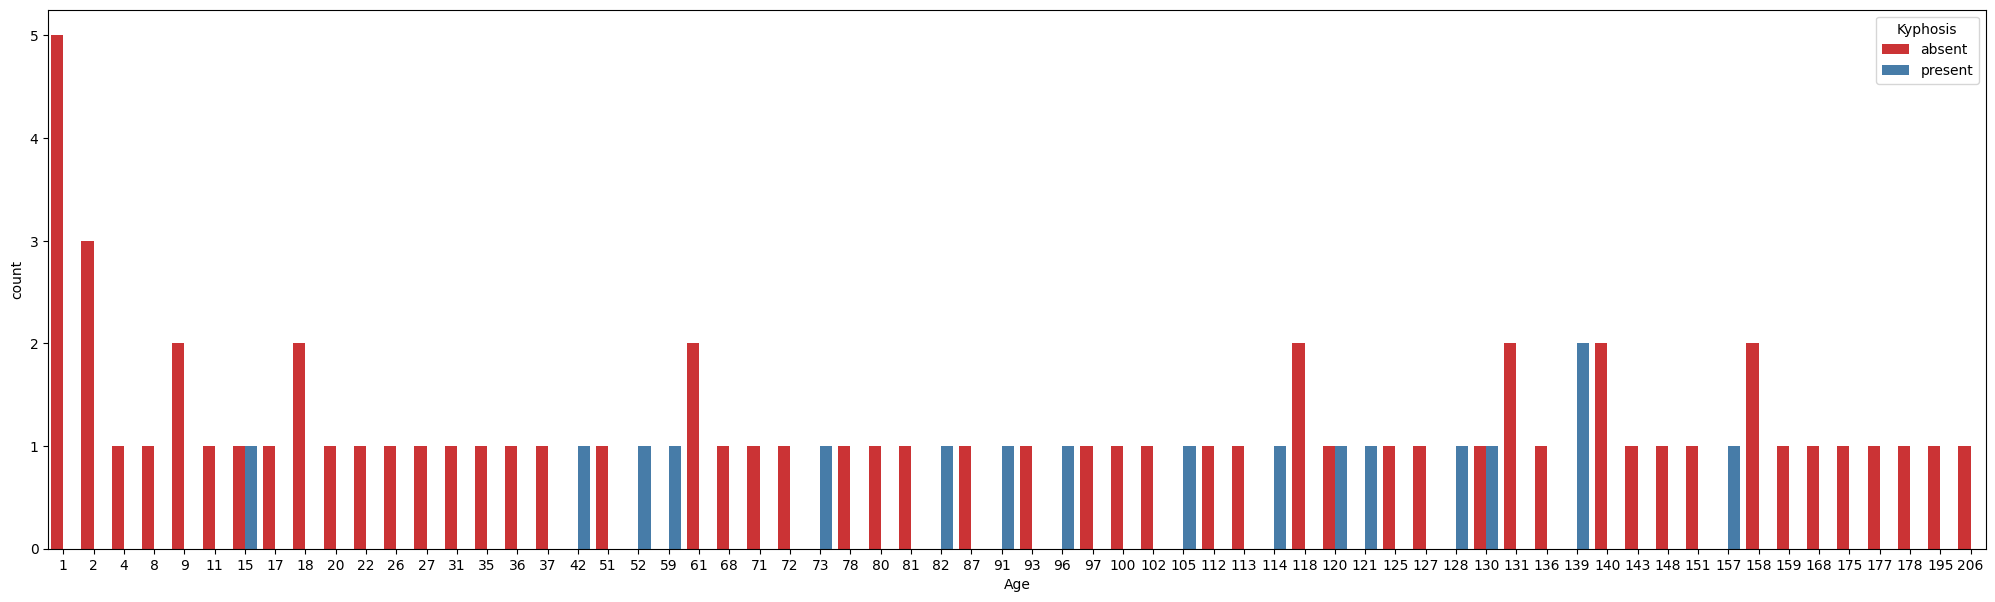

In [19]:
plt.figure(figsize=(25,7))
sns.countplot(x='Age',hue='Kyphosis',data=kyphosis,palette='Set1')

#### Split dataset into training and testing set

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 100)

In [81]:
X = kyphosis.drop('Kyphosis',axis=1)

In [102]:
X = kyphosis.iloc[:,[1,2,3]].values

In [103]:
y = kyphosis['Kyphosis']

#### Train a Decision Tree

In [104]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

#### Predict the model

In [105]:
y_pred = dtree.predict(X_test)
y_pred

array(['absent', 'present', 'present', 'absent', 'present', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'present', 'present', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'present'], dtype=object)

#### Evaluate the model

In [106]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      absent       0.88      0.68      0.77        22
     present       0.12      0.33      0.18         3

    accuracy                           0.64        25
   macro avg       0.50      0.51      0.48        25
weighted avg       0.79      0.64      0.70        25



In [107]:
print(confusion_matrix(y_test,y_pred))

[[15  7]
 [ 2  1]]


In [109]:
### Accuracy for decision tree is 64% (16 / 25)

### Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [111]:
y_pred_rfc = rfc.predict(X_test)
y_pred_rfc

array(['absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present'], dtype=object)

In [112]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

      absent       0.86      0.86      0.86        22
     present       0.00      0.00      0.00         3

    accuracy                           0.76        25
   macro avg       0.43      0.43      0.43        25
weighted avg       0.76      0.76      0.76        25



In [113]:
print(confusion_matrix(y_test,y_pred_rfc))

[[19  3]
 [ 3  0]]


In [63]:
### Accuracy for random forest is higher at 76% (19 + 0) / (19+3+3+0)